In [3]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [17]:
df_exploded = df.explode('job_skills')



In [19]:
skills_count = df_exploded.groupby(['job_skills','job_title_short',  ]).size()

In [25]:
df_skills_count = skills_count.reset_index(name='skill_count').sort_values(by='skill_count', ascending=False)

df_skills_count

,job_skills,job_title_short,skill_count
1480,python,Data Scientist,113711
1822,sql,Data Engineer,113130
1479,python,Data Engineer,108022
1821,sql,Data Analyst,92428
1823,sql,Data Scientist,78982
...,...,...,...
2173,webex,Senior Data Scientist,1
293,codecommit,Business Analyst,1
2233,xamarin,Machine Learning Engineer,1
1087,mlr,Machine Learning Engineer,1


In [29]:
job_tiltle = "Data Engineer"
top_skills = 15

df_skill_final = df_skills_count[df_skills_count['job_title_short'] == job_tiltle].head(top_skills)
df_skill_final

,job_skills,job_title_short,skill_count
1822,sql,Data Engineer,113130
1479,python,Data Engineer,108022
141,aws,Data Engineer,62049
151,azure,Data Engineer,60674
1772,spark,Data Engineer,53656
846,java,Data Engineer,35559
916,kafka,Data Engineer,29073
775,hadoop,Data Engineer,28815
1656,scala,Data Engineer,28716
393,databricks,Data Engineer,27477


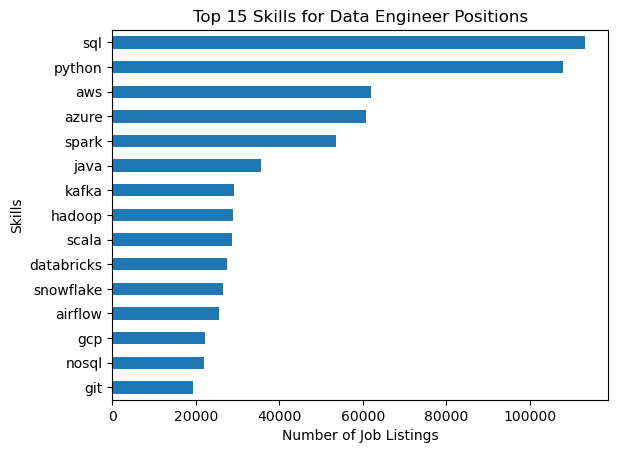

In [32]:
df_skill_final.plot(kind='barh', x='job_skills', y='skill_count', legend=False)
plt.xlabel('Number of Job Listings')        
plt.ylabel('Skills')
plt.title(f'Top {top_skills} Skills for {job_tiltle} Positions')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest values on top
plt.legend().set_visible(False)  # Hide legend
plt.show()
